In [ ]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ribhavkhanna","key":"93c3ed04e7b18af0a2fa3901a252a0b9"}'}

In [ ]:
!mkdir -p ~/.kaggle                                               
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download -d grassknoted/asl-alphabet


100% 1.02G/1.03G [00:28<00:00, 41.0MB/s]
100% 1.03G/1.03G [00:28<00:00, 38.5MB/s]


In [ ]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-01-03 16:16:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-03 16:16:18 (95.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [ ]:
unzip_data('asl-alphabet.zip')

In [ ]:
walk_through_dir('/content/asl_alphabet_train')

There are 1 directories and 0 images in '/content/asl_alphabet_train'.
There are 29 directories and 0 images in '/content/asl_alphabet_train/asl_alphabet_train'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/Y'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/D'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/R'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/P'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/K'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/E'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/Q'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/H'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_al

In [ ]:
# import tensorflow_hub as hub
# detector = hub.load("https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1")
# detector_output = detector(tf.expand_dims(resized,axis=0))
# class_ids = detector_output["detection_classes"]


In [ ]:
# rec = detector_output["num_detections"]
# rec

In [ ]:
# cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

In [ ]:
! pip install cvzone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for cvzone: filename=cvzone-1.5.6-py3-none-any.whl size=18767 sha256=ef1efacd44384fbbf31aa2b715a6ffd83b8fec3de4fb63e116b8f916f82e7cab
  Stored in directory: /root/.cache/pip/wheels/67/60/9a/e5060027d8eae2c01ba872fdbc094a6fe3fee15794ee3dc709
Successfully built cvzone


In [ ]:
! pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.0 MB 1.2 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.12.6 which is incompatible.


In [ ]:
# im2=cv.imread('')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
# from IPython.display import Image
# try:
#   filename = take_photo()
#   print('Saved to {}'.format(filename))
  
#   # Show the image which was just taken.
#   display(Image(filename))
# except Exception as err:
#   # Errors will be thrown if the user does not have a webcam or if they do not
#   # grant the page permission to access it.
#   print(str(err))

In [ ]:
# from cvzone.HandTrackingModule import HandDetector
# import cv2 as cv
# from google.colab.patches import cv2_imshow
# detector =HandDetector(detectionCon=0.5, maxHands=1)


# # Get image frame
# img=cv.imread('/content/photo.jpg')
# # cv2_imshow(img)
# # Find the hand and its landmarks
# # img = detector.findHands(img)
# hands, img = detector.findHands(img)

# # Display
# cv2_imshow(img)


In [ ]:
# d=hands[0]['bbox']
# (x,y,w,h)=d
# hand_roi = img[y:y+h, x:x+w]
# cv2_imshow(hand_roi)

### making training and test data

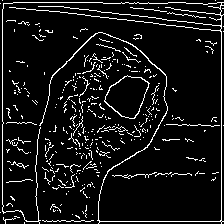

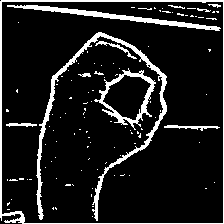

In [ ]:
from cvzone.HandTrackingModule import HandDetector
import os
from google.colab.patches import cv2_imshow
# import skimage
# from skimage.transform import resize
detector =HandDetector(detectionCon=0.5, maxHands=1)
path="/content/asl_alphabet_test/asl_alphabet_test/O_test.jpg"

a=path[-10:-9]
# img=cv.imread(path)
img_array = cv.imread(path)
    
# gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)


try:
  resized = cv.resize(img_array, (224,224), interpolation=cv.INTER_AREA)
  gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
  blur = cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT)
  canny = cv.Canny(blur, 7,9)
  adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 3)
  cv2_imshow(canny)
  cv2_imshow(adaptive_thresh)
except:
  print("hi")




In [ ]:
from cvzone.HandTrackingModule import HandDetector
import os
# import skimage
# from skimage.transform import resize
detector =HandDetector(detectionCon=0.5, maxHands=1)
p=[]
for i in os.listdir(r'/content/asl_alphabet_train/asl_alphabet_train'):
     p.append(i)
DIR=r'/content/asl_alphabet_train/asl_alphabet_train'

features=[]
labels=[]

def create_train():
    for alphabet in p:
        path = os.path.join(DIR, alphabet)
        label = p.index(alphabet)
        i=0
        for img in os.listdir(path):
            if i==500:
              break;
            i=i+1;
            img_path = os.path.join(path,img)
            # print(img_path)
            img_array = cv.imread(img_path)
            if img_array is None:
                continue 

            try:
              resized = cv.resize(img_array, (224,224), interpolation=cv.INTER_AREA)
              gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
              blur = cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT)
              canny = cv.Canny(blur, 7,9)
              # gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
              # adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 3)
            except:
              break
            features.append(canny)
            labels.append(label)


create_train()
print('Training done ---------------')

Training done ---------------


In [ ]:
print(p)

['Y', 'D', 'R', 'P', 'K', 'E', 'Q', 'H', 'space', 'del', 'X', 'J', 'F', 'I', 'S', 'V', 'Z', 'O', 'T', 'N', 'M', 'W', 'G', 'A', 'nothing', 'B', 'L', 'U', 'C']


In [ ]:
from cvzone.HandTrackingModule import HandDetector
import os

# p=[]
# for i in os.listdir(r'/content/asl_alphabet_test/asl_alphabet_test'):
#      p.append(i)
DIR2=r'/content/asl_alphabet_test/asl_alphabet_test'

features_test=[]
labels_test=[]

def create_test():
    
    for img in os.listdir(DIR2):
        img_path = os.path.join(DIR2,img)
        # print(img_path)
        alphabet=img_path[-10:-9]
        if alphabet=='g':
          alphabet="nothing"
        if alphabet=='e':
          alphabet="space"
        # print(alphabet)    
        label = p.index(alphabet)
        img_array = cv.imread(img_path)
        if img_array is None:
            continue 
            
        try:
          resized = cv.resize(img_array, (224,224), interpolation=cv.INTER_AREA)
          gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
          blur = cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT)
          canny = cv.Canny(blur, 7,9)
          # gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
          # adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 3)
        except:
          break
        features_test.append(canny)
        labels_test.append(label)

create_test()

In [ ]:
len(features),len(labels)

(14500, 14500)

In [ ]:
y_true=labels_test

In [ ]:
y=np.array(labels_test)
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [ ]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,29)
labels_test = to_categorical(labels_test,29)

In [ ]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
features=np.array(features)
features_test=np.array(features_test)

In [ ]:
len(features),len(labels)

(14500, 14500)

In [ ]:
y=np.array(labels)
np.unique(y)

array([0., 1.], dtype=float32)

### building the model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
# print("Packages imported...")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing 

data_augmentation=keras.Sequential([
    # preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.Rescaling(1./255),
],name="data_augmentation")

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(29,activation ="softmax"))



In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(11600, 2900, 11600, 2900)

In [ ]:
model.fit(x_train,y_train,
          epochs=5,
          validation_data=(x_test,y_test),)

Epoch 1/5
363/363 [==============================] - 24s 60ms/step - loss: 3.5467 - accuracy: 0.3598 - val_loss: 1.2540 - val_accuracy: 0.5728
Epoch 2/5
363/363 [==============================] - 21s 57ms/step - loss: 0.8201 - accuracy: 0.7184 - val_loss: 0.9825 - val_accuracy: 0.6648
Epoch 3/5
363/363 [==============================] - 21s 57ms/step - loss: 0.4212 - accuracy: 0.8526 - val_loss: 0.9680 - val_accuracy: 0.7014
Epoch 4/5
363/363 [==============================] - 21s 57ms/step - loss: 0.2629 - accuracy: 0.9102 - val_loss: 1.3010 - val_accuracy: 0.6862
Epoch 5/5
363/363 [==============================] - 21s 57ms/step - loss: 0.2200 - accuracy: 0.9309 - val_loss: 1.0781 - val_accuracy: 0.7024


In [ ]:
model.evaluate(features_test,labels_test)

1/1 [==============================] - 0s 322ms/step - loss: 1.0181 - accuracy: 0.8214


[1.0181149244308472, 0.8214285969734192]

In [ ]:
# create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

figsize=(10,10)

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

  # create the confusion matrix
  cm = confusion_matrix(y_true,tf.round(y_pred))
  cm_norm =cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # normalize our confussion matrix
  n_classes=cm.shape[0]

  # Let's prettify it
  fig,ax=plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  
  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to he bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshhold for diff colors
  threshold=(cm.max()+cm.min())/2

  # Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>threshold else "black",
            size=15)
            

In [ ]:
y_probs=model.predict(features_test)
# Convert all of the prediction probabilities into integers
y_preds=y_probs.argmax(axis=1)
# y_true=labels.argmax(axis=1)
# view the first 10 prediction labels
y_preds[:10],y_true[:10]

1/1 [==============================] - 0s 108ms/step


(array([13, 17, 11,  6,  5, 12, 13,  7, 20, 25]),
 [4, 17, 11, 6, 5, 12, 13, 7, 20, 25])

In [ ]:
from sklearn.metrics import confusion_matrix
# confusion_matrix(y_true=np.array(y_true),
#                  y_pred=y_preds)

<IPython.core.display.Javascript object>

Saved to photo.jpg


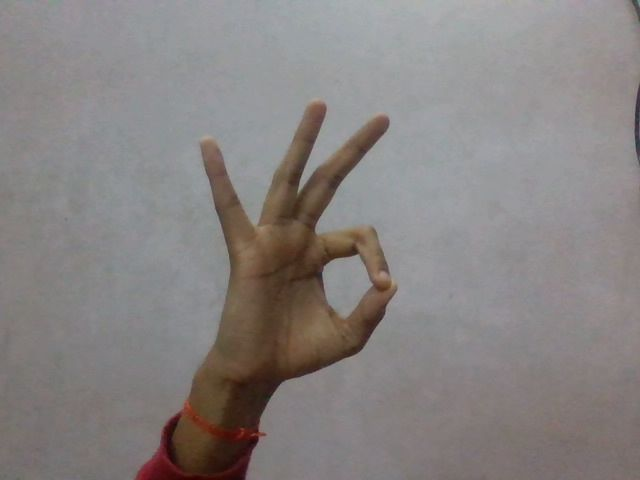

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

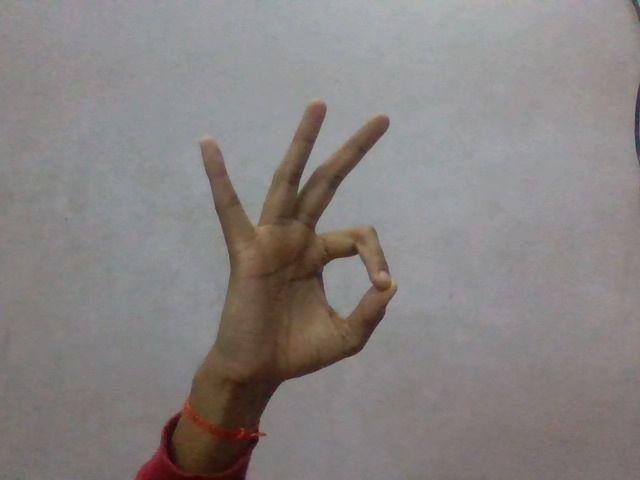

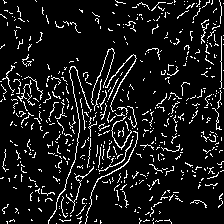

1/1 [==============================] - 0s 17ms/step
prediction is: nothing


In [ ]:

input=[]
img_array = cv.imread('/content/photo.jpg')
    
# gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
# cv2_imshow(img_array)
img=img_array.copy()
hands, immg2 = detector.findHands(img_array)
cv2_imshow(img)
if len(hands)==1:
  d=hands[0]['bbox']
  (x,y,w,h)=d
  hand_roi = img[y:y+h, x:x+w]
  resized = cv.resize(img, (224,224), interpolation=cv.INTER_AREA)
  gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
  blur = cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT)
  canny = cv.Canny(blur, 7,9)
  # gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
  # adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 5)
  input.append(canny)
  cv2_imshow(canny)
  predcit= model.predict(np.array(input))
  print(f"prediction is: {p[np.argmax(predcit)]}")
else:

  print("no hand detected try again") 

In [ ]:
p[np.argmax(predcit)]

'nothing'